# Advanced Machine Learning (CS4662). Cal State Univ. LA, CS Dept.
### Dr. Mohammad Porhoumayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

## Deep Convolutional Neural Networks (CNN) with Keras + TensorFlow
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

In [1]:
#2- Fashion Image Recognition using Deep Convolutional Neural Networks: 
 
#In this question, we try to improve the accuracy of the Fashion Image Recognition system that 
#we developed in the class in Lab5. Download and open the Lab5 ipython tutorial file (it is on 
#CANVAS). Add the following lines on the top of your code to fix random seed for reproducibility:

import numpy as np 
np.random.seed(0) 
 
#Now, Modify the CNN structure and parameters to increase the testing accuracy as much as you 
#can, but I expect  At LEAST 93% Accuracy on the TESTING Set.  
 
#I want you to be creative and use all knowledge you have gained from this class to improve the 
#results  (don’t  change  the  dataset,  you  can  only  change  the  CNN  structure  or  learning 
#parameters). Here are some ideas that you may want to use: 
    #1- Changing the structure or parameters of the CNN including all layers (Conv Layers, Pooling 
    #layers, Dropout Layers, Fully Connected Layers, ...). 
    #2- Making the Network more complex (when it is underfit), or less complex (when it is 
    #overfit). 
    #3- Improve the training process (e.g. changing the batch size, changing the epochs, changing 
    #the optimization or loss) 
 
 
#Please Notice: I- It is obvious that there are infinite number ways to change the code to improve the 
#results. Thus, I expect to receive a Unique code from each student. 
#II- You need to do Trial & Error to achieve the desired accuracy. That is why I decided to use 
#the Fashion Dataset since it includes small grayscale images that can be processed fast. 
#However, make sure to start early enough!  
#III- I recommend to run your code on Google Colab with the GPU runtime to make the 
#process faster. 
#IV- One student, who achieves the highest accuracy in the class, will get 10% bonus on the 
#overall grade of the class! 

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

import numpy as np

from tensorflow.keras import layers

## Let's use the Fashion-MNIST Dataset including 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images:

0:	T-shirt/top, 
1:	Trouser,
2:	Pullover,
3:	Dress,
4:	Coat,
5:	Sandal,
6:	Shirt,
7:	Sneaker,
8:	Bag,
9:	Ankle boot 

In [4]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


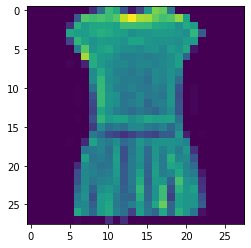

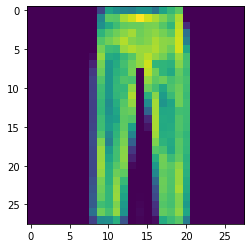

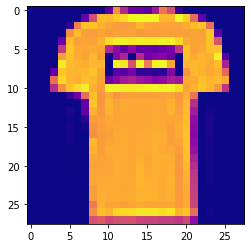

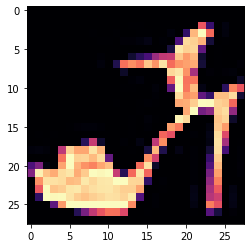

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()


In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [11]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [12]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Define the Network Architecture (model):

In [25]:
# Declare Sequential model fro our network:
model = Sequential()

In [26]:
# CNN first layer (with 32 3x3 filter):
#default value 32,3,3
model.add(Convolution2D(512, (28,28), activation='relu', input_shape=(28,28,1), padding="same"))
print(model.output_shape) # with no zero padding -> (None, 26, 26, 32)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(3,3)))
print(model.output_shape)


# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

(None, 28, 28, 512)
(None, 9, 9, 512)


In [27]:
# more hidden layers:
#default value 32,3,3
model.add(Convolution2D(512, (14, 14), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(3,3)))
print(model.output_shape)

model.add(Convolution2D(512, (7,7), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(3,3)))
print(model.output_shape)

model.add(Convolution2D(4096, (1,1), activation='relu', padding="same"))
print(model.output_shape)


# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 


(None, 9, 9, 512)
(None, 3, 3, 512)
(None, 3, 3, 512)
(None, 1, 1, 512)
(None, 1, 1, 4096)


In [28]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 4096)
(None, 128)
(None, 10)


## Compile the model:
#### We need to compile the model and then it will be ready to train it:

In [29]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 512)       401920    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 512)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 512)         51380736  
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 512)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 512)         12845568  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 512)       

In [18]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [19]:
# 320 = (3x3+1)x32 filters
# 9248 = (3x3x32+1)x32 filters
# 802944 = (6272+1)x128
# 1290 = (128+1)x10

## Training:

In [20]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1)
# history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=5, verbose=1)

# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iteration over the entire training data. 
# verbose: 0, 1, or 2. how want to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Epoch 1/5
1875/1875 [==============================] - 827s 438ms/step - loss: 0.4669 - accuracy: 0.8350
Epoch 2/5
1875/1875 [==============================] - 859s 458ms/step - loss: 0.3178 - accuracy: 0.8862
Epoch 3/5
1875/1875 [==============================] - 816s 435ms/step - loss: 0.2759 - accuracy: 0.8995
Epoch 4/5
1875/1875 [==============================] - 772s 412ms/step - loss: 0.2511 - accuracy: 0.9097
Epoch 5/5
1875/1875 [==============================] - 549s 293ms/step - loss: 0.2335 - accuracy: 0.9150


In [21]:
# Training with callbacks:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, min_delta=0)
# fitted_model = model.fit(X_train, y_train, validation_split=0.25, 
#                       batch_size=32, epochs=5, callbacks=[callback], verbose=1)

# min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
# patience: Number of epochs with no improvement after which training will be stopped.

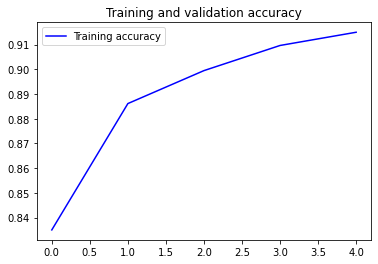

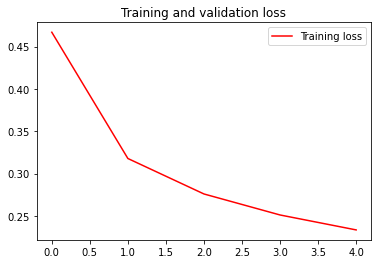

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

## Testing:

In [23]:
predicted_classes = model.predict(X_test)

In [24]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

313/313 [==============================] - 17s 53ms/step - loss: 0.2212 - accuracy: 0.9185
The accuracy is:  0.9185000061988831
